In [1]:
!pip install ipympl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#Gaussian SVM

In [2]:
# Widget to manipulate plots in Jupyter notebooks
%matplotlib widget 

import matplotlib.pyplot as plt # For general plotting
import matplotlib.colors as mcol
import pandas as pd
import numpy as np

from scipy.stats import multivariate_normal as mvn
from sklearn.linear_model import LogisticRegression

import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy.stats import norm, uniform
# Utility to visualize PyTorch network and shapes
from torchsummary import summary
import math
np.set_printoptions(suppress=True)
from google.colab import output
output.enable_custom_widget_manager()

from sys import float_info  # Threshold smallest positive floating value

from math import ceil, floor 

import matplotlib.pyplot as plt # For general plotting
np.random.seed(2)
import numpy as np

from scipy.optimize import minimize
from scipy.stats import multivariate_normal as mvn
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.linalg import sqrtm
import math
from sklearn.svm import SVC
from sklearn import datasets
from sklearn.model_selection import GridSearchCV
import plotly.graph_objects as go
from sklearn.preprocessing import PolynomialFeatures
# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(7)
torch.manual_seed(7)


plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fon

In [3]:
N_test = 10000
N_train = 1000

In [4]:
def get_data(n):
    angle = np.random.uniform(-np.pi, np.pi, n)
    return (
        np.array([np.cos(angle), np.sin(angle)])
        * np.concatenate((np.ones(n // 2) * 2, np.ones(n // 2) * 4))
    ).T + np.random.multivariate_normal(np.zeros(2), np.eye(2), n)

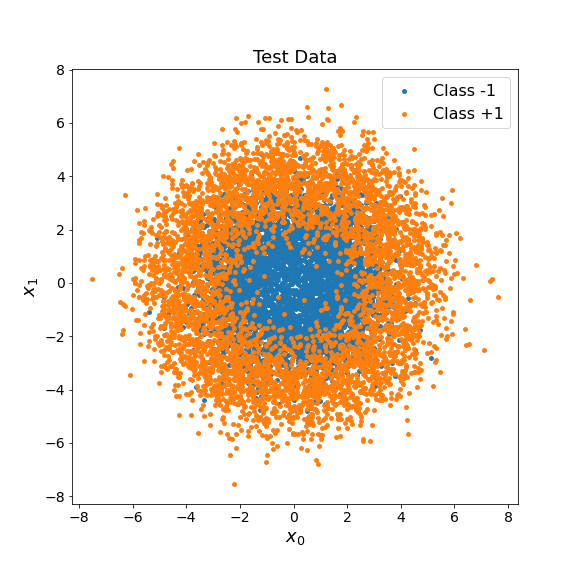

In [5]:
data=  pd.DataFrame(get_data(N_train), columns=["x0", "x1"]).assign(
    label=np.concatenate((-1 * np.ones(N_train // 2), np.ones(N_train // 2))) )
test_data = pd.DataFrame(get_data(N_test), columns=["x0", "x1"]).assign(
    test_label=np.concatenate((-1 * np.ones(N_test // 2), np.ones(N_test // 2)))
)

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(test_data['x0'][:5000], test_data['x1'][:5000], s=15)
ax.scatter(test_data['x0'][5000:], test_data['x1'][5000:], s=15)
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$x_1$")
ax.set_title("Test Data")
ax.legend(labels=["Class -1", "Class +1"])


In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
np.random.seed(2)
Cs = [0.1, 1, 10, 100, 100]
Gammas = [1, 0.1, 0.01, 0.001, 0.0001]
grid = GridSearchCV(SVC(kernel = 'rbf'), dict(C = Cs, gamma = Gammas), refit = True, verbose = 3, cv = 10)
grid.fit(data[["x0", "x1"]], data["label"])

Fitting 10 folds for each of 25 candidates, totalling 250 fits
[CV 1/10] END ...................C=0.1, gamma=1;, score=0.860 total time=   0.2s
[CV 2/10] END ...................C=0.1, gamma=1;, score=0.890 total time=   0.2s
[CV 3/10] END ...................C=0.1, gamma=1;, score=0.830 total time=   0.2s
[CV 4/10] END ...................C=0.1, gamma=1;, score=0.780 total time=   0.1s
[CV 5/10] END ...................C=0.1, gamma=1;, score=0.800 total time=   0.1s
[CV 6/10] END ...................C=0.1, gamma=1;, score=0.800 total time=   0.1s
[CV 7/10] END ...................C=0.1, gamma=1;, score=0.820 total time=   0.1s
[CV 8/10] END ...................C=0.1, gamma=1;, score=0.820 total time=   0.2s
[CV 9/10] END ...................C=0.1, gamma=1;, score=0.870 total time=   0.2s
[CV 10/10] END ..................C=0.1, gamma=1;, score=0.770 total time=   0.2s
[CV 1/10] END .................C=0.1, gamma=0.1;, score=0.860 total time=   0.1s
[CV 2/10] END .................C=0.1, gamma=0.

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001]},
             verbose=3)

In [7]:
pd.DataFrame(grid.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.141289,0.025012,0.017434,0.007842,0.1,1,"{'C': 0.1, 'gamma': 1}",0.86,0.89,0.83,0.78,0.80,0.80,0.82,0.82,0.87,0.77,0.824,0.037202,2
1,0.098779,0.023925,0.019211,0.006959,0.1,0.1,"{'C': 0.1, 'gamma': 0.1}",0.86,0.89,0.82,0.76,0.79,0.80,0.83,0.82,0.86,0.79,0.822,0.037363,5
2,0.156971,0.024198,0.025343,0.005910,0.1,0.01,"{'C': 0.1, 'gamma': 0.01}",0.75,0.72,0.79,0.78,0.78,0.77,0.79,0.72,0.74,0.80,0.764,0.028000,18
3,0.177350,0.032919,0.027169,0.010448,0.1,0.001,"{'C': 0.1, 'gamma': 0.001}",0.59,0.56,0.64,0.61,0.62,0.61,0.62,0.55,0.57,0.58,0.595,0.028018,20
4,0.140114,0.031843,0.032338,0.015592,0.1,0.0001,"{'C': 0.1, 'gamma': 0.0001}",0.48,0.46,0.54,0.60,0.52,0.44,0.50,0.48,0.50,0.49,0.501,0.042532,24
5,0.123087,0.033136,0.015147,0.007164,1,1,"{'C': 1, 'gamma': 1}",0.87,0.89,0.82,0.79,0.79,0.79,0.81,0.80,0.86,0.75,0.817,0.041243,10
6,0.027034,0.009567,0.004389,0.000960,1,0.1,"{'C': 1, 'gamma': 0.1}",0.86,0.89,0.81,0.77,0.79,0.79,0.80,0.82,0.88,0.77,0.818,0.041665,9
7,0.056708,0.028349,0.007904,0.003199,1,0.01,"{'C': 1, 'gamma': 0.01}",0.85,0.87,0.85,0.78,0.82,0.81,0.82,0.79,0.84,0.79,0.822,0.028566,8
8,0.084300,0.016998,0.013607,0.006472,1,0.001,"{'C': 1, 'gamma': 0.001}",0.59,0.57,0.64,0.61,0.62,0.61,0.62,0.55,0.57,0.58,0.596,0.026907,19
9,0.077844,0.006953,0.016536,0.008990,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.48,0.46,0.54,0.60,0.52,0.44,0.50,0.48,0.50,0.49,0.501,0.042532,24


In [8]:
print(f'Optimal C and Optimal Gamma:', grid.best_params_)

Optimal C and Optimal Gamma: {'C': 10, 'gamma': 0.01}


In [9]:
gaus_label = grid.predict(test_data[["x0", "x1"]])
res =1 - accuracy_score(test_data['test_label'], gaus_label)
print(f'Error Rate on the Test Set: {res:.2%}')

Error Rate on the Test Set: 16.54%


In [10]:
def plot_grid_search(cv_results, grid_param_1, grid_param_2, name_param_1, name_param_2):
    # Get Test Scores Mean and std for each grid search
    scores_mean = cv_results['mean_test_score']
    scores_mean = np.array(scores_mean).reshape(len(grid_param_2),len(grid_param_1))

    scores_sd = cv_results['std_test_score']
    scores_sd = np.array(scores_sd).reshape(len(grid_param_2),len(grid_param_1))

    # Plot Grid search scores
    _, ax = plt.subplots(1,1)

    # Param1 is the X-axis, Param 2 is represented as a different curve (color line)
    for idx, val in enumerate(grid_param_2):
        ax.plot(grid_param_1, scores_mean[idx,:], '-o', label= name_param_2 + ': ' + str(val))

    ax.set_title("Grid Search Scores", fontsize=20, fontweight='bold')
    ax.set_xlabel(name_param_1, fontsize=16)
    ax.set_ylabel('CV Mean Test Score', fontsize=16)
    ax.legend(loc="best", fontsize=15)
    ax.grid('on')

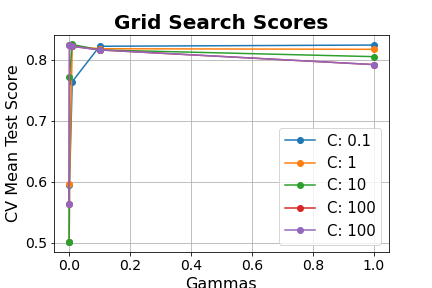

In [11]:
# Calling Method 
plot_grid_search(grid.cv_results_, Gammas, Cs, 'Gammas', 'C')

In [12]:
test_svm = test_data.assign(pred=grid.predict(test_data[["x0", "x1"]]))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


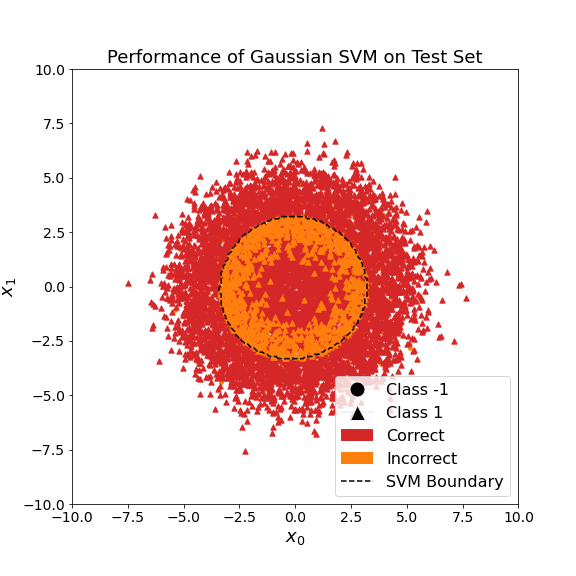

In [13]:
colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

x_x, y_y = np.meshgrid(np.linspace(-10, 10, 200), np.linspace(-10, 10, 200))
Z_svm = grid.predict(np.c_[x_x.ravel(), y_y.ravel()])

fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(
    test_svm[(test_svm.test_label == -1) & (test_svm.pred == -1)]["x0"],test_svm[(test_svm.test_label == -1) & (test_svm.pred == -1)]["x1"],
    s=14,c=colors[3],)
ax.scatter(
    test_svm[(test_svm.test_label == -1) & (test_svm.pred == 1)]["x0"],test_svm[(test_svm.test_label == -1) & (test_svm.pred == 1)]["x1"],
    s=14,c=colors[1],)
ax.scatter(
    test_svm[(test_svm.test_label == 1) & (test_svm.pred == 1)]["x0"],test_svm[(test_svm.test_label == 1) & (test_svm.pred == 1)]["x1"],
    s=28, marker="^", c=colors[3],)
ax.scatter(
    test_svm[(test_svm.test_label == 1) & (test_svm.pred == -1)]["x0"],
    test_svm[(test_svm.test_label == 1) & (test_svm.pred == -1)]["x1"],
    s=28, c=colors[1], marker="^",)

ax.contour(x_x, y_y, Z_svm.reshape(x_x.shape), levels=[0], colors="k", linestyles="--")
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$x_1$")
ax.set_title("Performance of Gaussian SVM on Test Set")

legend_elements = [Line2D([0],[0],color="#f0f0f0",markerfacecolor="k",marker="o", markersize=15,label="Class -1",),
    Line2D([0],[0],color="#f0f0f0",markerfacecolor="k",marker="^",markersize=15,label="Class 1",),
    Patch(facecolor=colors[3], label="Correct"),Patch(facecolor=colors[1], label="Incorrect"),
    Line2D([0],[0],linestyle="--",color="black",label="SVM Boundary",),]
ax.legend(handles=legend_elements)

#MLP

In [19]:
# Widget to manipulate plots in Jupyter notebooks
%matplotlib widget 
import matplotlib.pyplot as plt # For general plotting
import matplotlib.colors as mcol
import numpy as np
from scipy.stats import multivariate_normal as mvn
from sklearn.linear_model import LogisticRegression
import torch
import torch.nn as nn
import torch.nn.functional as F
from scipy.stats import norm, uniform
# Utility to visualize PyTorch network and shapes
from torchsummary import summary
import math
np.set_printoptions(suppress=True)
from google.colab import output
output.enable_custom_widget_manager()

from sys import float_info  # Threshold smallest positive floating value

from math import ceil, floor 

import matplotlib.pyplot as plt # For general plotting

import numpy as np

from scipy.optimize import minimize
from scipy.stats import multivariate_normal as mvn

from sklearn.preprocessing import PolynomialFeatures
# Set seed to generate reproducible "pseudo-randomness" (handles scipy's "randomness" too)
np.random.seed(0)
plt.rc('font', size=22)          # controls default text sizes
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=18)     # fontsize of the x and y labels
plt.rc('xtick', labelsize=14)    # fontsize of the tick labels
plt.rc('ytick', labelsize=14)    # fontsize of the tick labels
plt.rc('legend', fontsize=16)    # legend fontsize
plt.rc('figure', titlesize=22)   # fon

if torch.cuda.is_available():
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
    device = "cuda"
    torch.multiprocessing.set_start_method("spawn")
    torch.cuda.manual_seed_all(0)
else:
    device = "cpu"
    torch.manual_seed(0)

In [20]:
if torch.cuda.is_available():
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
    device = "cuda"
    torch.multiprocessing.set_start_method("spawn")
    torch.cuda.manual_seed_all(0)
else:
    device = "cpu"
    torch.manual_seed(0)
    
class Model(nn.Sequential):
  def __init__(self, p=10): 
    super().__init__(
            nn.Linear(2, p), nn.ReLU(), nn.Linear(p, 2), nn.Softmax(dim=1)
        )
    self.p = p

  def model_train(self,data,criterion=nn.CrossEntropyLoss(),
      optimizer=lambda p: torch.optim.SGD(p, lr=0.01, momentum=0.9, nesterov=True),
      reset_parameters=True,n_epochs=50,seed=None,
      ):
    
    if seed is not None:
      torch.cuda.manual_seed_all(seed)
      self.train()
    if reset_parameters:
      self.reset_parameters()
    optimizer = optimizer(self.parameters())

    for _ in range(n_epochs):
      running_loss = 0.0
      for batch, (X, y) in enumerate(data):
        outputs = self(X)
        loss = criterion(outputs, y)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

  def predict(self, X):
    self.eval()
    test_loss = 0
    with torch.no_grad():
      outputs = self(X)
    return outputs.argmax(1)

  @torch.no_grad()
  def reset_parameters(self):
    for layer in self.children():
      if hasattr(layer, "reset_parameters"):
        layer.reset_parameters()

In [21]:
from torch.utils.data import DataLoader, TensorDataset
from torch.utils.data.dataloader import default_collate
from sklearn.model_selection import KFold

if torch.cuda.is_available():
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
    device = "cuda"
    torch.multiprocessing.set_start_method("spawn")
    torch.cuda.manual_seed_all(0)
else:
    device = "cpu"
    torch.manual_seed(0)

X_train_tensor = torch.FloatTensor(data[["x0", "x1"]].values).to(device)
y_train_tensor = torch.LongTensor(np.where(data["label"].values == -1, 0, 1)).to(
    device
)
X_test_tensor = torch.FloatTensor(test_data[["x0", "x1"]].values).to(device)
y_test_tensor = torch.LongTensor(np.where(test_data["test_label"].values == -1, 0, 1)).to(
    device
)

kf = KFold(n_splits = 10, shuffle= True)

def cross_validate(X, y, p_star):
    e_k = []

    for train_indices, valid_indices in kf.split(X):
        model = Model(p_star)

        X_train = X[train_indices]
        y_train = y[train_indices]

        model.model_train(
            DataLoader(
                TensorDataset(X_train, y_train),
                batch_size=50,
            ),
        )

        X_valid = X[valid_indices]
        y_valid = y[valid_indices]

        y_pred = model.predict(X_valid)

        error_rate = y_pred[y_pred != y_valid].flatten().shape[0] / y_valid.shape[0]
        e_k.append(error_rate)

    e_m = np.mean(e_k)
    return e_m


def train_model_cross_validate(X, y, p_stars):
    errors = np.array([cross_validate(X, y, p_star) for p_star in p_stars])
    p_star_opt = p_stars[np.argmin(errors)]
    min_error_rate = np.min(errors)
    return p_star_opt, min_error_rate, errors


In [22]:
if torch.cuda.is_available():
    torch.set_default_tensor_type("torch.cuda.FloatTensor")
    device = "cuda"
    torch.multiprocessing.set_start_method("spawn")
    torch.cuda.manual_seed_all(0)
else:
    device = "cpu"
    torch.manual_seed(0)
p_vals = np.arange(5,15)
p_optimum, min_err_rate, errors = train_model_cross_validate(X_train_tensor, y_train_tensor, p_vals)
pd.DataFrame(
        np.array([p_vals, errors]).T, columns=["P", "error"]
    ).sort_values("error").to_csv("cv_err.csv")

In [23]:
print(f"Optimal Perceptron Count: {p_optimum}")

Optimal Perceptron Count: 9


In [24]:
from os.path import exists
if exists("cv_err.csv"):
    df = pd.read_csv("/content/cv_err.csv", index_col=0)
df

,P,error
4,9.0,0.173
5,10.0,0.176
8,13.0,0.176
2,7.0,0.179
1,6.0,0.183
9,14.0,0.183
3,8.0,0.184
6,11.0,0.184
0,5.0,0.186
7,12.0,0.186


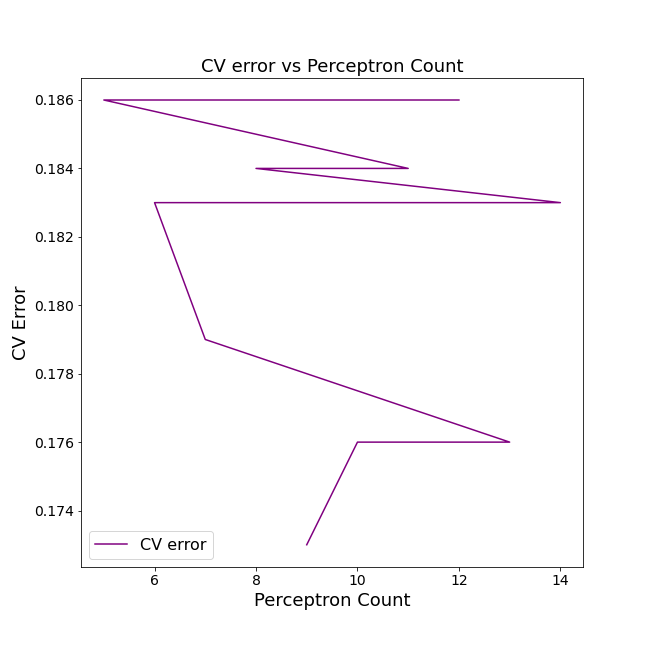

In [29]:
fig, ax = plt.subplots(figsize=(9, 9))
ax.plot(df.P, df.error, label="CV error", color ='purple')
ax.set_title(r"CV error vs Perceptron Count")
ax.set_xlabel(r"Perceptron Count")
ax.set_ylabel(r"CV Error")
ax.legend()

In [30]:
best_model = Model(p_optimum)
best_model.model_train(
    DataLoader(
        TensorDataset(X_train_tensor, y_train_tensor),
        batch_size=50,
        ),
      )
y_test_pred = np.where(best_model.predict(X_test_tensor).detach().cpu().numpy() == 0, -1, 1)

best_model_test_df = test_data.assign(Predicted=y_test_pred)
bestMod_err_rate = best_model_test_df[best_model_test_df.Predicted != best_model_test_df.test_label].shape[0] / N_test
print(f"Error Rate (On Test Set):  {bestMod_err_rate:.2%}")

Error Rate (On Test Set):  17.47%


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: No contour levels were found within the data range.


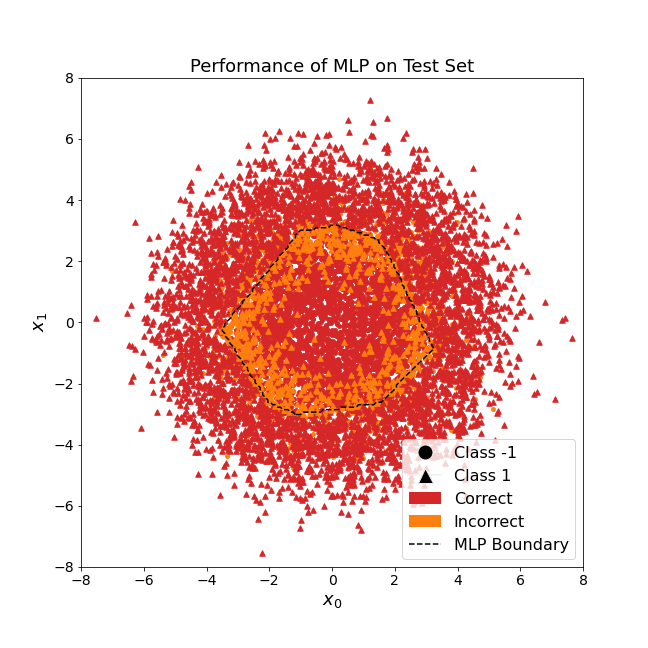

In [31]:
from matplotlib.lines import Line2D
from matplotlib.patches import Patch

colors = plt.rcParams["axes.prop_cycle"].by_key()["color"]

xx, yy = np.meshgrid(np.linspace(-8, 8, 200), np.linspace(-8, 8, 200))
Z_nn = (best_model.predict(torch.FloatTensor(np.c_[xx.ravel(), yy.ravel()]).to(device),
        ).detach().cpu().numpy())

fig, ax = plt.subplots(figsize=(9, 9))
ax.scatter(
    best_model_test_df[(best_model_test_df.test_label == -1) & (best_model_test_df.Predicted == -1)]["x0"],
    best_model_test_df[(best_model_test_df.test_label == -1) & (best_model_test_df.Predicted == -1)]["x1"],
    s=15,c=colors[3],
    )
ax.scatter(
    best_model_test_df[(best_model_test_df.test_label == -1) & (best_model_test_df.Predicted == 1)]["x0"],
    best_model_test_df[(best_model_test_df.test_label == -1) & (best_model_test_df.Predicted== 1)]["x1"],
    s=15, c=colors[1],
)
ax.scatter(
    best_model_test_df[(best_model_test_df.test_label == 1) & (best_model_test_df.Predicted == 1)]["x0"],
    best_model_test_df[(best_model_test_df.test_label == 1) & (best_model_test_df.Predicted == 1)]["x1"],
    s=30, marker="^", c=colors[3],
)
ax.scatter(
    best_model_test_df[(best_model_test_df.test_label == 1) & (best_model_test_df.Predicted == -1)]["x0"],
    best_model_test_df[(best_model_test_df.test_label == 1) & (best_model_test_df.Predicted == -1)]["x1"],
    s=30, c=colors[1],marker="^",
)
ax.contour(xx, yy, Z_nn.reshape(xx.shape), levels=[0], colors="k", linestyles="--")
ax.set_xlabel(r"$x_0$")
ax.set_ylabel(r"$x_1$")
ax.set_title("Performance of MLP on Test Set")

legend_elements = [Line2D([0],[0], color="#f0f0f0",markerfacecolor="k",marker="o", markersize=15,label="Class -1",),
       Line2D([0],[0],color="#f0f0f0",markerfacecolor="k", marker="^", markersize=15,label="Class 1",),
       Patch(facecolor=colors[3], label="Correct"),Patch(facecolor=colors[1], label="Incorrect"),
       Line2D([0],[0],linestyle="--",color="black",label="MLP Boundary",),]
ax.legend(handles=legend_elements)